# SkyWatch EarthCache API Demonstration

### Configure working environment and pathnames

In [1]:
import os
import pandas as pd

In [2]:
# define repo name and get root working directory
repo = 'earthcache'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'c:\\Users\\gijst\\Documents\\Master Data Science\\Agurotech\\Crop_yield_prediction\\earthcache'

In [3]:
# add repo source + notebooks directory to system path
import sys
sys.path.insert(0, os.path.join( root_path, 'src' ) )
sys.path.insert(0, os.path.join( root_path, 'notebooks' ) )

In [4]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path

'c:\\Users\\gijst\\Documents\\Master Data Science\\Agurotech\\Crop_yield_prediction\\earthcache\\cfg'

### Create instance of client class and search criterion

In [7]:
pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=ae383810f8f3eabbbbc2d96056a77208f590b40c6bc0bcb8c73b2a6e67901672
  Stored in directory: c:\users\gijst\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
Note: you may need to restart the kernel to use updated packages.


In [8]:
# create instance of shclient class
from client import EcClient
client = EcClient( cfg_path, max_cost=10 )

In [9]:
# define geojson aoi collated with my house
aoi = { "type": "Polygon", 
        "coordinates": [ [ 
                            [ -2.665678, 51.201079 ], 
                            [ -2.657440, 51.201079 ], 
                            [ -2.657440, 51.211206 ], 
                            [ -2.665678, 51.211206 ], 
                            [ -2.665678, 51.201079 ] 
                            ] ] 
    }

In [10]:
# examine back-catalogues for 2019-2020
window = { 'start_date' : '2019-01-01', 'end_date' : '2020-12-31' }

### Identify medium resolution archived imagery satisfying spatiotemporal contraints

In [11]:
# first look for coincident medium resolution scenes
resolution = [ 'high' ]
status, result, search_id = client.processSearch(   aoi, 
                                                    window, 
                                                    resolution=resolution, 
                                                    coverage=30, 
                                                    delay=3 )
status, search_id

(200, '10dd8a6e-8353-409b-88fa-39fb0d6c698d')

In [12]:
# encode json response into dataframe
search_df = pd.DataFrame( result[ 'data' ] )
search_df = search_df.sort_values( 'result_cloud_cover_percentage' )
search_df

id  \
1  83e49659-374f-4346-9899-fa525c397cbb   
0  452b464b-a7f4-4959-b448-fc37cf21ab40   
2  f88480bc-4f2e-4764-ba4a-1d883b3193b0   
4  416ba066-23e5-4acf-883c-2421c015b22b   
5  8e24936c-9d16-493a-9af3-01beaa15d0e7   
3  787a4d74-1162-463b-ab92-989276173be5   

                                            location      source  \
1  {'type': 'Polygon', 'coordinates': [[[-2.91271...    Pleiades   
0  {'coordinates': [[[-2.6604551003728587, 51.097...      SkySat   
2  {'type': 'Polygon', 'coordinates': [[[-2.65982...    Pleiades   
4  {'type': 'Polygon', 'coordinates': [[[-2.75389...  Kompsat-3A   
5  {'type': 'Polygon', 'coordinates': [[[-2.70042...  Kompsat-3A   
3  {'coordinates': [[[-2.661208404587891, 51.0149...      SkySat   

                                        product_name  resolution  \
1  DS_PHR1A_202004211125354_FR1_PX_W003N51_0405_0...        0.50   
0                         20200309_135431_ssc7_u0001        0.50   
2  DS_PHR1B_202008231120566_FR1_PX_W003N51_0703_0...        0.50   
4              K3A_20200223125954_27135_00003610_L0F        0.55   
5              K3A_20200825131457_29916_00131289_L0F        0.55   
3                        20200220_140731_ssc10_u0001        0.50   

                         start_time                          end_time  \
1  2020-04-21T11:25:35.000000+00:00  2020-04-21T11:25:35.000000+00:00   
0     2020-03-09T13:54:31.812+00:00     2020-03-09T13:54:31.812+00:00   
2  2020-08-23T11:20:56.000000+00:00  2020-08-23T11:20:56.000000+00:00   
4  2020-02-23T12:59:55.000000+00:00  2020-02-23T12:59:55.000000+00:00   
5  2020-08-25T13:15:09.000000+00:00  2020-08-25T13:15:09.000000+00:00   
3       2020-02-20T14:07:31.5+00:00       2020-02-20T14:07:31.5+00:00   

                                         preview_uri  \
1  https://preview.airbus.terrastream.ca/airbus/p...   
0  https://preview.skywatch.com/planet/skysat/202...   
2  https://preview.airbus.terrastream.ca/airbus/p...   
4  https://preview.siis.terrastream.ca/siis/komps...   
5  https://preview.siis.terrastream.ca/siis/komps...   
3  https://preview.skywatch.com/planet/skysat/202...   

                                       thumbnail_uri  \
1  https://preview.airbus.terrastream.ca/airbus/p...   
0  https://preview.skywatch.com/planet/skysat/202...   
2  https://preview.airbus.terrastream.ca/airbus/p...   
4  https://preview.siis.terrastream.ca/siis/komps...   
5  https://preview.siis.terrastream.ca/siis/komps...   
3  https://preview.skywatch.com/planet/skysat/202...   

   location_coverage_percentage  area_sq_km                         cost  \
1                    100.000000    0.647709  Upgrade your plan for price   
0                    100.000000    0.647709  Upgrade your plan for price   
2                     64.003513    0.414557  Upgrade your plan for price   
4                    100.000000    0.647709  Upgrade your plan for price   
5                    100.000000    0.647709  Upgrade your plan for price   
3                     63.424369    0.410806  Upgrade your plan for price   

   result_cloud_cover_percentage available_credit  
1                              0             None  
0                             32             None  
2                             41             None  
4                             60             None  
5                             70             None  
3                             91             None

### Review and create pipeline configuration from archive search result

In [13]:
# get pipeline configuration
status, result = client.getPipelines()

In [14]:
# parse response into dataframe and print
pipeline_df = pd.DataFrame( result[ 'data'] )
pipeline_df

id                           name  \
0   44a09503-87b8-48d5-bebe-ca001465dcd2         High Resolution Sample   
1   6b6b09e1-f907-4226-a624-5831f4d7361e  High Resolution Sample - NDVI   
2   f064155d-4a70-4209-9bb7-cd06fefa004b          Low Resolution Sample   
3   e94350b7-932a-4a2c-9da4-6a228a38b84a       Medium Resolution Sample   
4   8028528e-8c3c-11ed-930e-fac86027ef58                 experimenting1   
5   11ce3e68-8c44-11ed-a12f-ea12a5592194                                  
6   983009f0-8c44-11ed-a12f-ea12a5592194                 experimenting2   
7   7f9cd878-8d07-11ed-94b2-c6d06d6a3fe9                       PEN_NDVI   
8   0437c978-8ff9-11ed-8653-e6ee372554cf                        Hengelo   
9   47367ac6-8ff9-11ed-8653-e6ee372554cf               v1.NDVI.Zeewolde   
10  cea89998-8ffa-11ed-8e71-0a622480a56b              v1.NDVI.Flevoland   
11  ad8a0baa-8ffc-11ed-b637-52d4e03a75ba        v2.NDVI.Zeewolde.Winter   
12  6339c03a-8ffd-11ed-b637-52d4e03a75ba                            AMS   

    start_date    end_date                                                aoi  \
0   2020-06-23  2020-06-25  {'type': 'Polygon', 'coordinates': [[[8.246130...   
1   2020-06-23  2020-06-25  {'type': 'Polygon', 'coordinates': [[[8.246130...   
2   2020-06-23  2020-06-25  {'type': 'Polygon', 'coordinates': [[[8.246130...   
3   2020-07-07  2020-07-07  {'type': 'Polygon', 'coordinates': [[[8.246130...   
4   2022-12-01  2022-12-31  {'type': 'Polygon', 'coordinates': [[[5.681079...   
5   2022-12-01  2022-12-31  {'type': 'Polygon', 'coordinates': [[[5.382413...   
6   2022-11-01  2022-12-31  {'type': 'Polygon', 'coordinates': [[[-9.40949...   
7   2022-12-01  2022-12-31  {'type': 'Polygon', 'coordinates': [[[-9.40949...   
8   2020-07-09  2021-04-09  {'type': 'Polygon', 'coordinates': [[[6.227616...   
9   2022-12-26  2023-01-08  {'type': 'Polygon', 'coordinates': [[[5.341261...   
10  2022-06-06  2022-06-19  {'type': 'Polygon', 'coordinates': [[[5.097656...   
11  2022-12-19  2023-01-09  {'type': 'Polygon', 'coordinates': [[[5.097656...   
12  2022-01-01  2022-12-31  {'type': 'Polygon', 'coordinates': [[[4.728759...   

       area_km2  cloud_cover_percentage  min_aoi_coverage_percentage interval  \
0     24.620489                     100                           10      14d   
1     24.620489                     100                           10      14d   
2     24.620489                     100                           10      14d   
3     24.620489                     100                            0       1d   
4      3.418870                     100                           80      14d   
5    152.845164                     100                           80       7d   
6     14.966951                     100                           80       7d   
7     14.966951                     100                           80       7d   
8     17.560774                     100                           80      30d   
9     56.468836                     100                           80      14d   
10  3995.028017                     100                           80      14d   
11  3995.028017                     100                           80      14d   
12   288.912403                     100                           80      60d   

    resolution_low  resolution_high  \
0              1.5              0.3   
1              1.5              0.3   
2             30.0             10.0   
3              3.0              3.0   
4             30.0              8.1   
5             30.0              8.1   
6             30.0              8.1   
7             30.0              8.1   
8             30.0              8.1   
9             30.0              8.1   
10            30.0              8.1   
11            30.0              8.1   
12            30.0              8.1   

                                               output    status  \
0   {'id': 'rgbn-a3e8-11e7-9793-ae4260ee3b4b', 'fo...  complete   
1   {'id': '154311a8-582a-11e7-b30d-

In [15]:
# get id of true colour image output
output_id = client.getOutputIdFromName( 'True Colour Image' )
output_id

'a8fc3dde-a3e8-11e7-9793-ae4260ee3b4b'

In [16]:
# get unique id for scene with least cloud contamination
search_results = search_df.iloc[ 0 ].id
search_results

'83e49659-374f-4346-9899-fa525c397cbb'

In [17]:
# create pipeline from search results
status, result = client.createPipelineFromSearch(   search_id, 
                                                    search_results, 
                                                    name='wells_skywatch_pleiades',
                                                    output={    "id": output_id,
                                                                "format": "geotiff",
                                                                "mosaic": "off"
                                                    }
                                            )


In [18]:
# response from server - status is pending
status, result

(500,
 {'errors': 'Something went wrong when processing the request. Please contact our support team.'})

### Check pipeline created successfully and await delivery of images

In [19]:
# get pipeline id
pipeline_id = client.getPipelineIdFromName( 'wells_skywatch_pleiades')
pipeline_id

In [20]:
# get status - its active !
status, result = client.getPipeline( pipeline_id )
status, result

(404, {'errors': [{'message': 'Not found'}]})

In [21]:
# get interval results - check status / message (retrieving...)
status, result = client.getIntervalResults( pipeline_id )
status, result

(404, {'errors': [{'message': 'Not found'}]})

In [22]:
# after 20 minutes, check status / message
status, result = client.getIntervalResults( pipeline_id )
status, result

(404, {'errors': [{'message': 'Not found'}]})

### Download image datasets, load and visualise data

In [21]:
# download image and metadata
root_path = 'c:\\Users\\Chris.Williams\\Desktop\\earthcache-test'
images = []

# convert to dataframe
df = pd.DataFrame( result[ 'data' ] )
for row in df.itertuples():

    out_path = os.path.join( root_path, row.id )
    images.append( client.getImages( row.results, out_path ) )
images

... downloading https://s3-us-west-2.amazonaws.com/aoi-processed-images-prod/009ec630-0c93-11ec-bfd0-96b13152de61/d77cd062-ffd2-467c-a83f-20c3c00d052d/metadata/SKYWATCH_PHR_PS_20190109T1125_TC_Tile_0_0_P637Pk_metadata.json
100% [................................................................................] 8090 / 8090... downloading https://s3-us-west-2.amazonaws.com/aoi-processed-images-prod/009ec630-0c93-11ec-bfd0-96b13152de61/d77cd062-ffd2-467c-a83f-20c3c00d052d/analytic/SKYWATCH_PHR_PS_20190109T1125_TC_Tile_0_0_P637Pk.tif
100% [........................................................................] 30967412 / 30967412

[['c:\\Users\\Chris.Williams\\Desktop\\earthcache-test\\6ffdf2c1-db78-4be7-8e48-ce4df5cc002b\\20190109_112510/SKYWATCH_PHR_PS_20190109T1125_TC_Tile_0_0_P637Pk.tif']]

In [28]:
from osgeo import gdal
import matplotlib.pyplot as plt
  
ds = gdal.Open( images[ 0 ][ 0 ] )
data = ds.ReadAsArray()
data

ModuleNotFoundError: No module named 'osgeo'

In [26]:
import numpy as np
np.amin( data[ 0, : , : ]), np.amax( data[ 0, : , : ] )

NameError: name 'data' is not defined

In [24]:
data.shape

(3, 2252, 1145)

In [27]:
# get stats
mean = np.mean( data )
std = np.std( data ) 
mean, std

(0.066116795, 0.037364796)

In [28]:
# clip to 95%
_min = mean-2*std; _max = mean+2*std
clip_data = np.clip( data, mean-2*std, mean+2*std )
_min, _max

(-0.008612796664237976, 0.140846386551857)

In [29]:
# compute normalised data
norm_data = ( clip_data - _min ) / ( _max - _min )

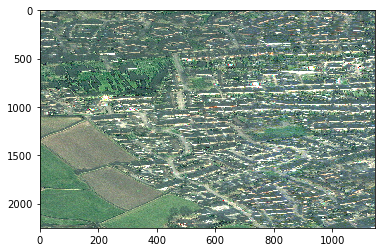

In [30]:
# show image
plt.imshow( norm_data.transpose( 1, 2, 0 ), interpolation='nearest', aspect='auto' )
plt.show()